# Introduction to CNN Keras - Acc 0.997 (top 8%) 
#### 18/07/2017

Original Kernel : 

https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6



* **1. Introduction**
* **2. Data preparation**
    * 2.1 Load data
    * 2.2 Check for null and missing values
    * 2.3 Data Resampling
    * 2.4 Normalization
    * 2.5 Reshape
    * 2.6 Split training and valdiation set
* **3. CNN**
    * 3.1 Define the model
    * 3.2 Set the optimizer and annealer
    * 3.3 Data augmentation
* **4. Evaluate the model**
    * 4.1 Training and validation curves
    * 4.2 Confusion matrix
* **5. Prediction and submition**
    * 5.1 Predict and Submit results

# 1. Introduction

This is a 5 layers Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. I choosed to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, I will prepare the data (handwritten digits images) then i will focus on the CNN modeling and evaluation.

I achieved 99.671% of accuracy with this CNN trained in 2h30 on a single CPU (i5 2500k). For those who have a >= 3.0 GPU capabilites (from GTX 650 - to recent GPUs), you can use tensorflow-gpu with keras. Computation will be much much faster !!!

**For computational reasons, i set the number of steps (epochs) to 2, if you want to achieve 99+% of accuracy set it to 30.**

This Notebook follows three main parts:

* The data preparation
* The CNN modeling and evaluation
* The results prediction and submission




<img src="http://img1.imagilive.com/0717/mnist-sample.png" ></img>

In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from copy import deepcopy


from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Read Data

In [2]:
# Install the Kaggle library
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()                     # upload [kaggle.json]

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nourmamdouh","key":"72822c2dc70171f87bd4c33db71b5174"}'}

In [4]:
# Make a folder named “.kaggle”
! mkdir ~/.kaggle

In [5]:
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [6]:
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
# Mount Drive:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
! kaggle kernels output yassineghouzam/introduction-to-cnn-keras-0-997-top-6 -p /path/to/dest

Output file downloaded to /path/to/dest/cnn_mnist_datagen.csv
Kernel log downloaded to /path/to/dest/introduction-to-cnn-keras-0-997-top-6.log 


# 2. Data preparation
## 2.1 Load data

In [8]:
# Load the data
train = pd.read_csv('sample_data/mnist_train_small.csv', header= None)
test = pd.read_csv("sample_data/mnist_test.csv", header= None)

In [9]:
print(train.shape)
print(test.shape)

(20000, 785)
(10000, 785)


In [10]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.2 Check for null and missing values

In [12]:
# Check the data
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [13]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

I check for corrupted images (missing values inside).

There is no missing values in the train and test dataset. So we can safely go ahead.

## 2.3 Data Resampling

## `Train Data`

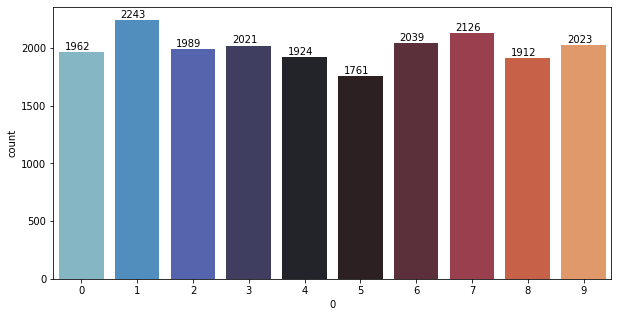

1    2243
7    2126
6    2039
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

In [14]:
plt.figure(figsize= [10, 5])
ax = sns.countplot(x= train[0], palette="icefire")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
plt.show()

train[0].value_counts()

In [15]:
# sampling:
train= train.groupby(0).sample(1761,random_state=42)
train=train.sort_index()
train.reset_index(drop= True, inplace= True)
train.shape

(17610, 785)

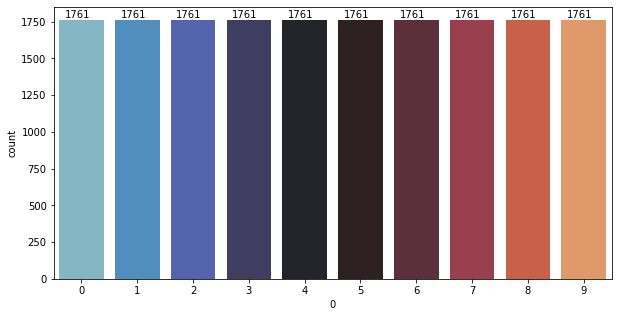

6    1761
5    1761
9    1761
2    1761
0    1761
7    1761
8    1761
4    1761
3    1761
1    1761
Name: 0, dtype: int64

In [16]:
plt.figure(figsize= [10, 5])
ax = sns.countplot(x= train[0], palette="icefire")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
plt.show()

train[0].value_counts()

In [17]:
X_train = train.iloc[:, 1:] 
y_train = train.iloc[:, 0]

# free some space
del train 

## `Test Data`

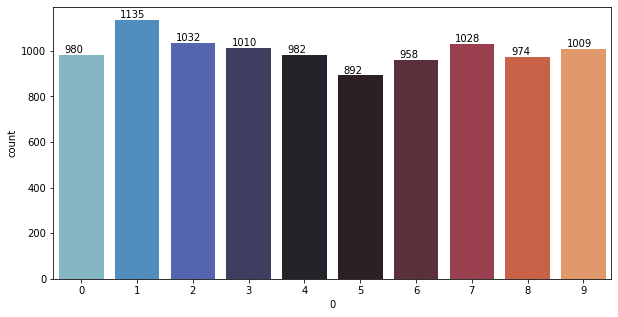

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 0, dtype: int64

In [18]:
plt.figure(figsize= [10, 5])
ax = sns.countplot(x= test[0], palette="icefire")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
plt.show()

test[0].value_counts()

In [19]:
# sampling:
test= test.groupby(0).sample(892,random_state=42)
test=test.sort_index()
test.reset_index(drop= True, inplace= True)
test.shape

(8920, 785)

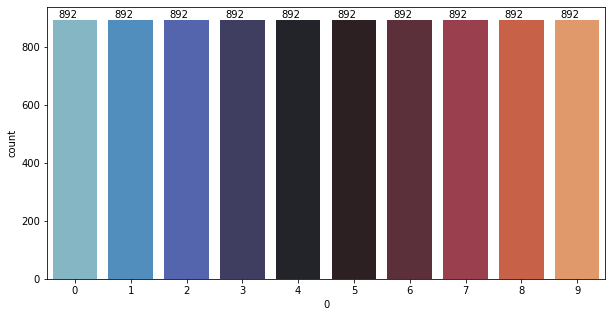

7    892
2    892
0    892
4    892
1    892
9    892
5    892
6    892
3    892
8    892
Name: 0, dtype: int64

In [20]:
plt.figure(figsize= [10, 5])
ax = sns.countplot(x= test[0], palette="icefire")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
plt.show()

test[0].value_counts()

In [21]:
X_test = test.iloc[:, 1:] 
y_test = test.iloc[:, 0]

# free some space
del test 

## 2.4 Normalization

We perform a grayscale normalization to reduce the effect of illumination's differences. 

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [22]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

## 2.5 Reshape

In [23]:
print(X_train.shape)
print(X_test.shape)

(17610, 784)
(8920, 784)


In [24]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , chanal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [25]:
print(X_train.shape)
print(X_test.shape)

(17610, 28, 28, 1)
(8920, 28, 28, 1)


Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices. 

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices. 

## 2.6 Split training and valdiation set 

In [26]:
# Split the train and the validation set for the fitting
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.4, random_state= 42)

I choosed to split the test set in two parts : a fraction (40%) became the validation set which the model is evaluated and the rest (60%) is used to test the model.

Since we have 42 000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set. Be carefull with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation. 

To avoid that, you could use stratify = True option in train_test_split function (**Only for >=0.17 sklearn versions**).

## Image Overview

We can get a better sense for 20 of these examples by visualising the image and looking at the label.

In [27]:
label_nums= list(range(10))                   # because the labels names is   0, 1, 2, ..... , 9
label_nums

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Train set

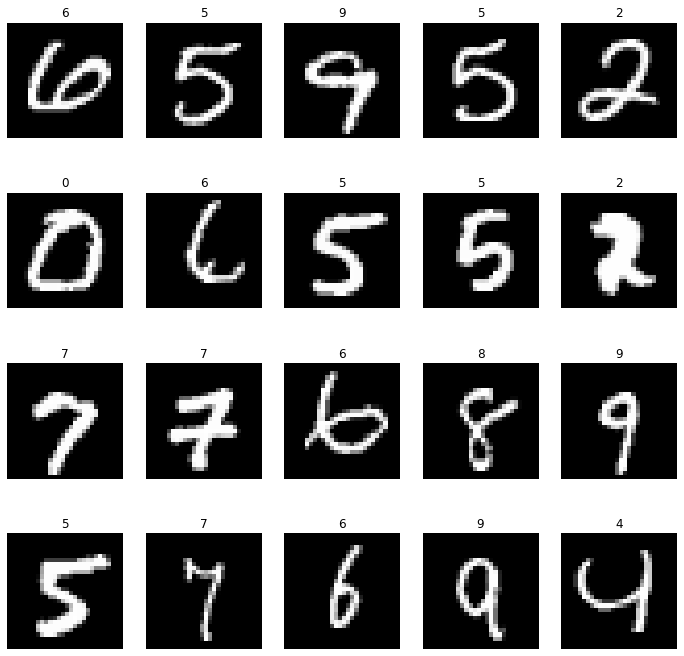

In [28]:
plt.figure(figsize=(12,12))
for i in range(0,20) :
    plt.subplot(4,5,i+1)
    plt.axis('off')
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')           # <-- this line of code i can do it as -->  plt.imshow(X_train[i][:,:,0], cmap='gray')                   
    nums = label_nums[int(np.array(y_train)[i])]
    plt.title(nums)

### Test set

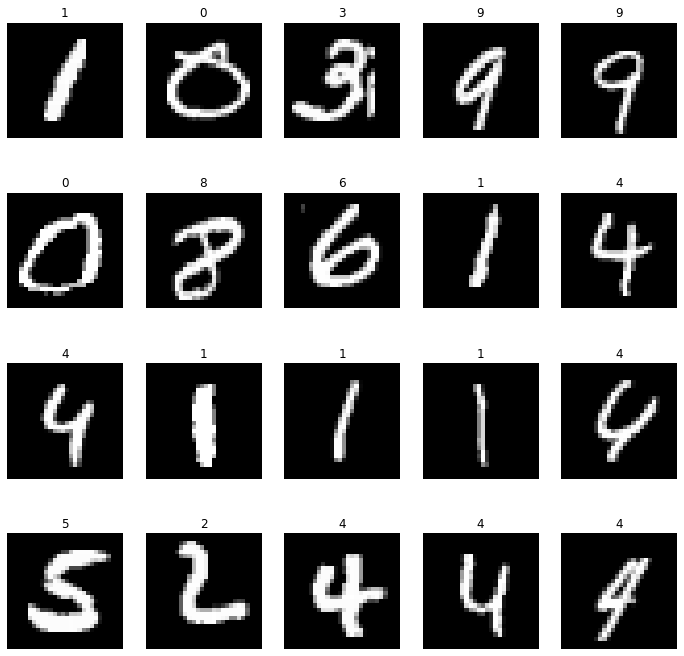

In [29]:
plt.figure(figsize=(12,12))
for i in range(0,20) :
    plt.subplot(4,5,i+1)
    plt.axis('off')
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')           # <-- this line of code i can do it as -->  plt.imshow(X_train[i][:,:,0], cmap='gray')                   
    nums = label_nums[int(np.array(y_test)[i])]
    plt.title(nums)

# 3. CNN
## 3.1 Define the model

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important. 

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. 

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network. 

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [32]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

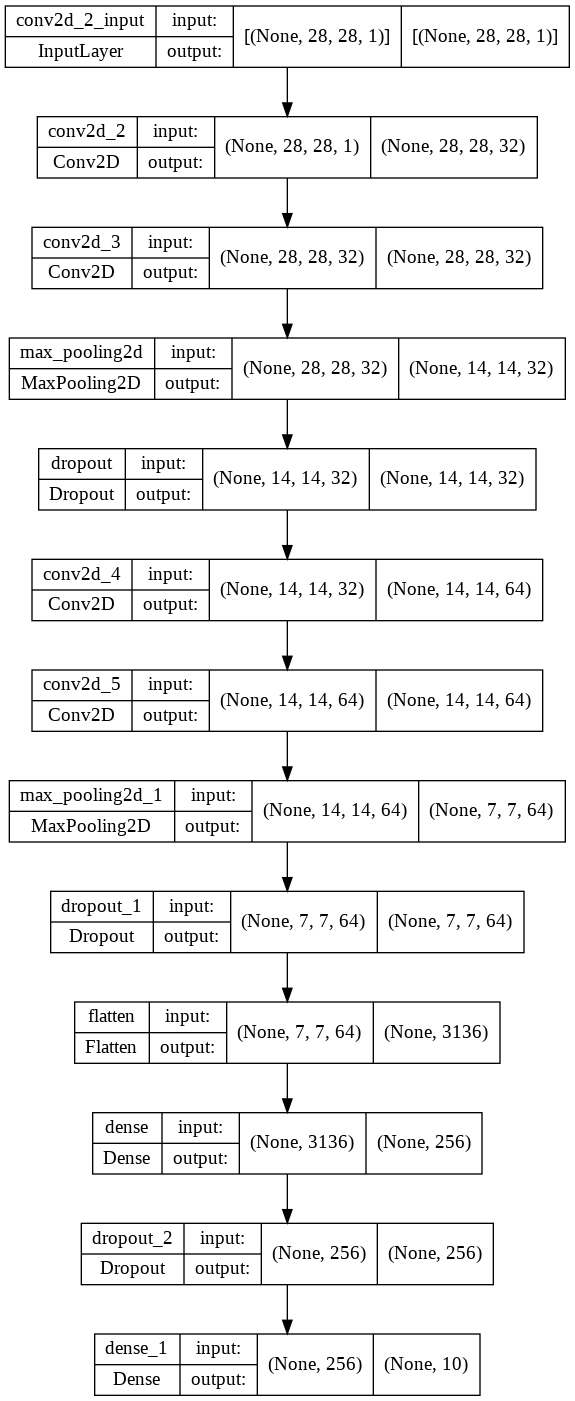

In [33]:
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

## 3.2 Set the optimizer and annealer

Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm.

We define the loss function to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy".

The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons ...) in order to minimise the loss. 

I choosed RMSprop (with default values), it is a very effective optimizer. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate.
We could also have used Stochastic Gradient Descent ('sgd') optimizer, but it is slower than RMSprop.

The metric function "accuracy" is used is to evaluate the performance our model.
This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

In [38]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [39]:
# Compile the model
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

# Callbacks

**Early Stop**

To prevent over fitting we will stop the learning after `number` of epochs and `val_loss` value not decreased

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 10 steps

**ModelCheckpoint**

to save the best training model 

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function. 

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [40]:
MODEL_NUM= 1

In [41]:
early_stopping = EarlyStopping(monitor='val_loss',  patience=15, mode='min')

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=10, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

mc = ModelCheckpoint('/content/drive/MyDrive/CNN Examples/best_model'+str(MODEL_NUM)+'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [42]:
y_train=  np.array(y_train)
y_val=    np.array(y_val)
y_test=   np.array(y_test)

In [43]:
callback= [early_stopping, learning_rate_reduction, mc]
History = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=370, verbose=1, callbacks= callback)

Epoch 1/500
48/48 [==============================] - ETA: 0s - loss: 0.8254 - accuracy: 0.7338
Epoch 1: val_loss improved from inf to 0.19550, saving model to /content/drive/MyDrive/CNN Examples/best_model1.h5
48/48 [==============================] - 14s 38ms/step - loss: 0.8254 - accuracy: 0.7338 - val_loss: 0.1955 - val_accuracy: 0.9386 - lr: 0.0010
Epoch 2/500
47/48 [============================>.] - ETA: 0s - loss: 0.1971 - accuracy: 0.9410
Epoch 2: val_loss improved from 0.19550 to 0.09271, saving model to /content/drive/MyDrive/CNN Examples/best_model1.h5
48/48 [==============================] - 1s 30ms/step - loss: 0.1977 - accuracy: 0.9409 - val_loss: 0.0927 - val_accuracy: 0.9678 - lr: 0.0010
Epoch 3/500
47/48 [============================>.] - ETA: 0s - loss: 0.1139 - accuracy: 0.9638
Epoch 3: val_loss improved from 0.09271 to 0.06922, saving model to /content/drive/MyDrive/CNN Examples/best_model1.h5
48/48 [==============================] - 1s 27ms/step - loss: 0.1140 - accu

In [44]:
model = load_model('/content/drive/MyDrive/CNN Examples/best_model'+str(MODEL_NUM)+'.h5')

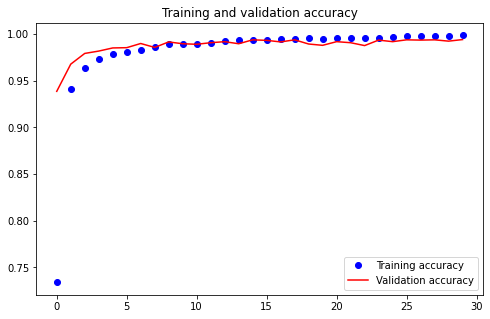

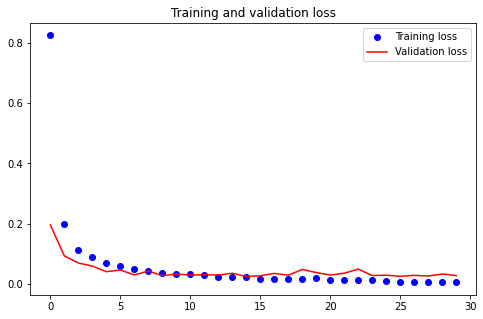

In [45]:
accuracy = History.history['accuracy']
val_accuracy = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy, 'bo')
plt.plot(epochs, val_accuracy, 'r')
plt.title('Training and validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.figure(figsize=(8, 5))

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'r')
plt.title('Training and validation loss')
plt.legend(['Training loss', 'Validation loss' ])
plt.show()

## Accuracy & loss of ***Training***

In [46]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}'.format(loss))
print('Train Accuracy: {}'.format(acc))

Train loss: 0.005186970811337233
Train Accuracy: 0.9980124831199646


## Accuracy & loss of ***Validation***

In [47]:
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.024462198838591576
Test Accuracy: 0.9938340783119202


## Accuracy & loss of ***Testing***

In [48]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Final_Test loss: {}'.format(loss))
print('Final_Test Accuracy: {}'.format(acc))

Final_Test loss: 0.03451309725642204
Final_Test Accuracy: 0.9889760613441467


# Prediction Images Overview

## ***Test*** Prediction

In [49]:
predict_x = model.predict(X_test) 
y_test_predict = np.argmax(predict_x, axis=1)

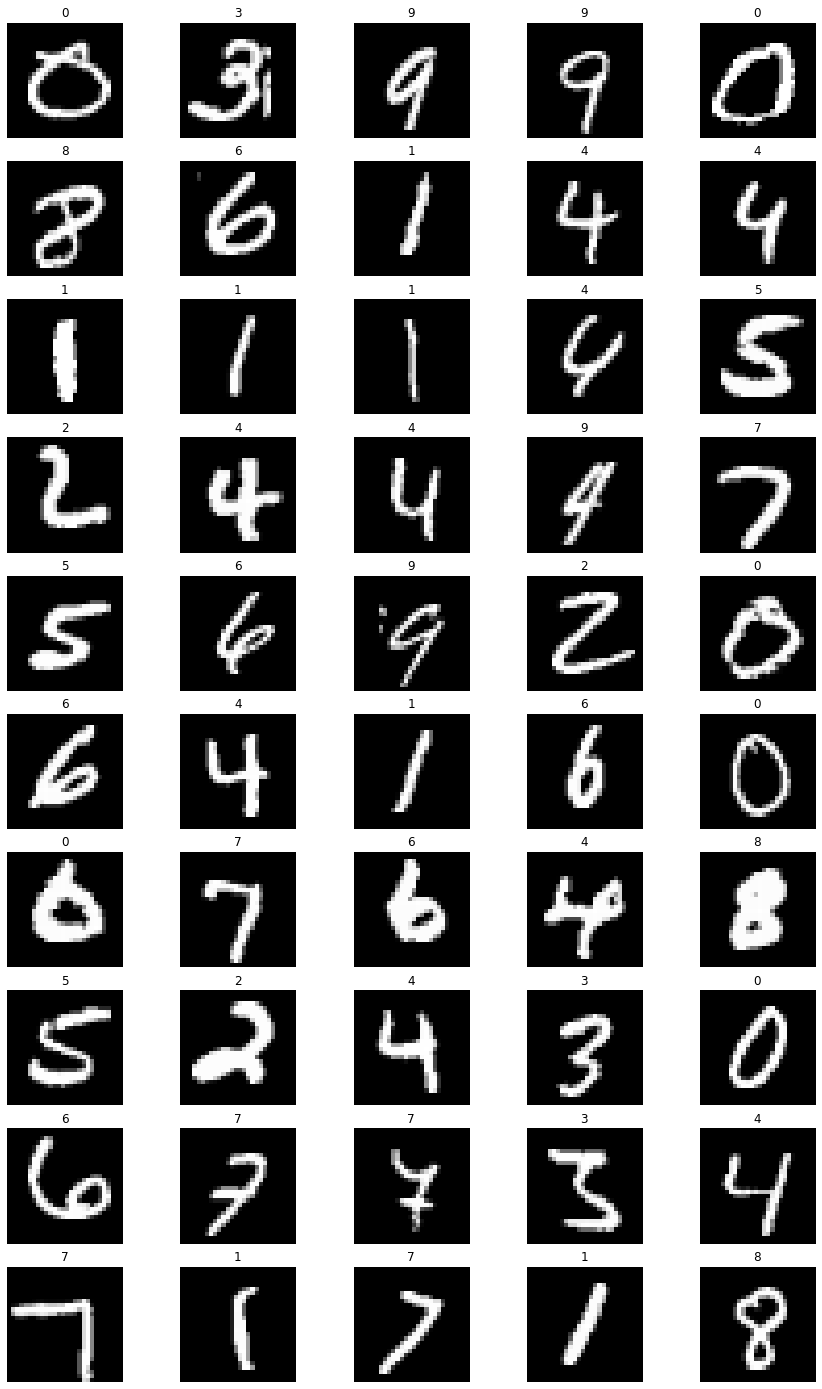

In [55]:
plt.figure(figsize=(15,25))

for i in range(1,51):
  plt.subplot(10,5,i)
  plt.axis('off')
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  nums = label_nums[int(y_test_predict[i])]
  plt.title(nums)

## ***Train*** Prediction

In [56]:
predict_x = model.predict(X_train) 
y_train_predict = np.argmax(predict_x, axis=1)

## Train ***Confusion Matrix***:

Text(51.0, 0.5, 'Real')

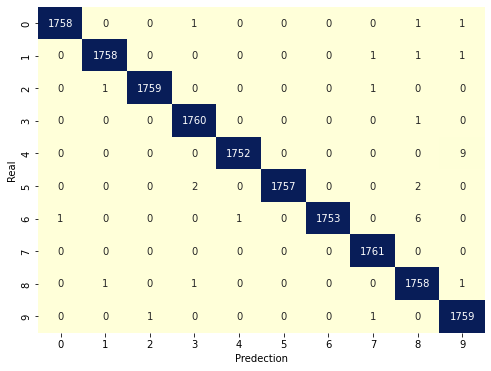

In [57]:
cmat = confusion_matrix(y_train, y_train_predict, labels=label_nums)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=label_nums, yticklabels=label_nums);

plt.xlabel('Predection')
plt.ylabel('Real')


## ***Train*** Report

In [58]:
print(classification_report(y_train, y_train_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1761
           1       1.00      1.00      1.00      1761
           2       1.00      1.00      1.00      1761
           3       1.00      1.00      1.00      1761
           4       1.00      0.99      1.00      1761
           5       1.00      1.00      1.00      1761
           6       1.00      1.00      1.00      1761
           7       1.00      1.00      1.00      1761
           8       0.99      1.00      1.00      1761
           9       0.99      1.00      1.00      1761

    accuracy                           1.00     17610
   macro avg       1.00      1.00      1.00     17610
weighted avg       1.00      1.00      1.00     17610



_____________________________________
_____________________________________

## ***Validation*** Prediction

In [59]:
predict_x = model.predict(X_val) 
y_val_predict = np.argmax(predict_x, axis=1)

## Validation ***Confusion Matrix***:

Text(51.0, 0.5, 'Real')

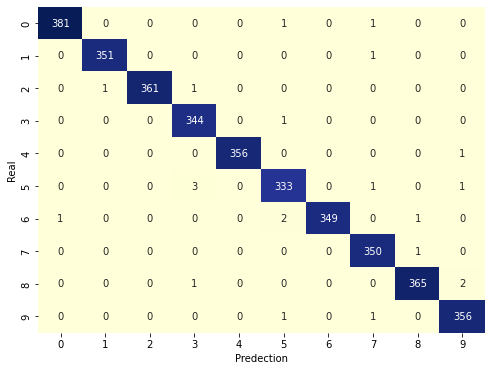

In [60]:
cmat = confusion_matrix(y_val, y_val_predict, labels= label_nums)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=label_nums, yticklabels=label_nums);

plt.xlabel('Predection')
plt.ylabel('Real')


## ***Validation*** Report

In [61]:
print(classification_report(y_val, y_val_predict))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       383
           1       1.00      1.00      1.00       352
           2       1.00      0.99      1.00       363
           3       0.99      1.00      0.99       345
           4       1.00      1.00      1.00       357
           5       0.99      0.99      0.99       338
           6       1.00      0.99      0.99       353
           7       0.99      1.00      0.99       351
           8       0.99      0.99      0.99       368
           9       0.99      0.99      0.99       358

    accuracy                           0.99      3568
   macro avg       0.99      0.99      0.99      3568
weighted avg       0.99      0.99      0.99      3568



_____________________________________
_____________________________________

## Test ***Confusion Matrix***:

Text(51.0, 0.5, 'Real')

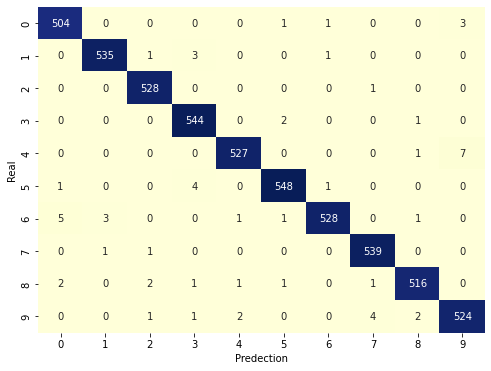

In [62]:
cmat = confusion_matrix(y_test, y_test_predict, labels=label_nums)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=label_nums, yticklabels=label_nums);

plt.xlabel('Predection')
plt.ylabel('Real')


## ***Test*** Report

In [63]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       509
           1       0.99      0.99      0.99       540
           2       0.99      1.00      0.99       529
           3       0.98      0.99      0.99       547
           4       0.99      0.99      0.99       535
           5       0.99      0.99      0.99       554
           6       0.99      0.98      0.99       539
           7       0.99      1.00      0.99       541
           8       0.99      0.98      0.99       524
           9       0.98      0.98      0.98       534

    accuracy                           0.99      5352
   macro avg       0.99      0.99      0.99      5352
weighted avg       0.99      0.99      0.99      5352



_____
_____
_____
_____
_____
_____
_____
_____
_____
_____
_____
_____

#### We will fit the model again with data augmentation

## 3.3 Data augmentation 

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered 
The scale is not the same (some who write with big/small numbers)
The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. 

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

The improvement is important : 
   - Without data augmentation i obtained an accuracy of 98.114%
   - With data augmentation i achieved 99.67% of accuracy

In [65]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
          featurewise_center=False,             # set input mean to 0 over the dataset
          samplewise_center=False,              # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,   # divide each input by its std
          zca_whitening=False,                  # apply ZCA whitening
          rotation_range=10,                    # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                     # Randomly zoom image 
          width_shift_range=0.1,                # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,               # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,                # randomly flip images
          vertical_flip=False)                  # randomly flip images


datagen.fit(X_train)

For the data augmentation, i choosed to :
   - Randomly rotate some training images by 10 degrees
   - Randomly  Zoom by 10% some training images
   - Randomly shift images horizontally by 10% of the width
   - Randomly shift images vertically by 10% of the height
   
I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

In [69]:
batch_size = 86
callback= [early_stopping, learning_rate_reduction, mc]

In [74]:
# Fit the model
History = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs = 500, validation_data = (X_val, y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks= callback)

Epoch 1/500
203/204 [============================>.] - ETA: 0s - loss: 0.1012 - accuracy: 0.9679
Epoch 1: val_loss improved from 0.02365 to 0.02025, saving model to /content/drive/MyDrive/CNN Examples/best_model1.h5
204/204 [==============================] - 7s 37ms/step - loss: 0.1013 - accuracy: 0.9679 - val_loss: 0.0202 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 2/500
202/204 [============================>.] - ETA: 0s - loss: 0.0875 - accuracy: 0.9722
Epoch 2: val_loss did not improve from 0.02025
204/204 [==============================] - 5s 27ms/step - loss: 0.0878 - accuracy: 0.9719 - val_loss: 0.0339 - val_accuracy: 0.9871 - lr: 0.0010
Epoch 3/500
203/204 [============================>.] - ETA: 0s - loss: 0.0851 - accuracy: 0.9749
Epoch 3: val_loss improved from 0.02025 to 0.01732, saving model to /content/drive/MyDrive/CNN Examples/best_model1.h5
204/204 [==============================] - 6s 27ms/step - loss: 0.0847 - accuracy: 0.9751 - val_loss: 0.0173 - val_accuracy: 0.9947 - 

In [75]:
model = load_model('/content/drive/MyDrive/CNN Examples/best_model'+str(MODEL_NUM)+'.h5')

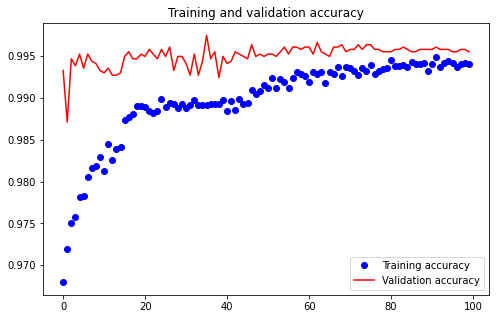

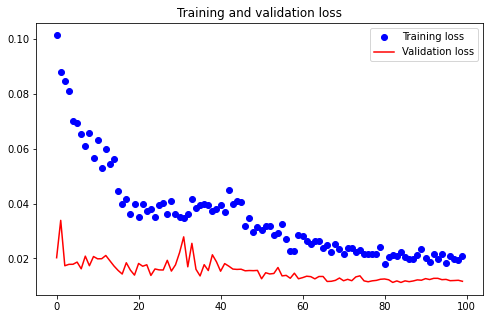

In [76]:
accuracy = History.history['accuracy']
val_accuracy = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy, 'bo')
plt.plot(epochs, val_accuracy, 'r')
plt.title('Training and validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.figure(figsize=(8, 5))

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'r')
plt.title('Training and validation loss')
plt.legend(['Training loss', 'Validation loss' ])
plt.show()

## Accuracy & loss of ***Training***

In [77]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}'.format(loss))
print('Train Accuracy: {}'.format(acc))

Train loss: 0.0026330219116061926
Train Accuracy: 0.9992617964744568


## Accuracy & loss of ***Validation***

In [78]:
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.011242019943892956
Test Accuracy: 0.9957959651947021


## Accuracy & loss of ***Testing***

In [79]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Final_Test loss: {}'.format(loss))
print('Final_Test Accuracy: {}'.format(acc))

Final_Test loss: 0.020702088251709938
Final_Test Accuracy: 0.9951419830322266


# Prediction Images Overview

## ***Test*** Prediction

In [80]:
predict_x = model.predict(X_test) 
y_test_predict = np.argmax(predict_x, axis=1)

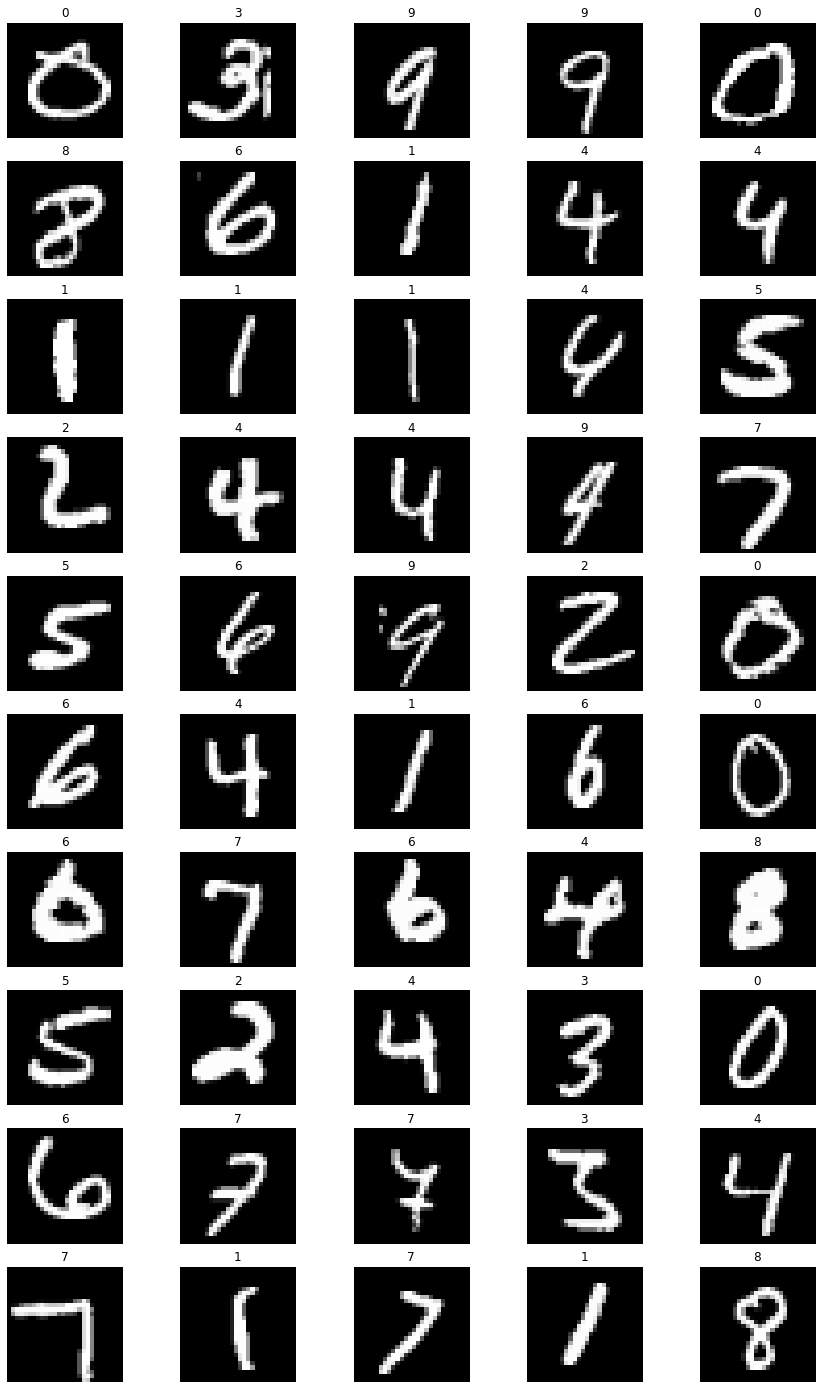

In [81]:
plt.figure(figsize=(15,25))

for i in range(1,51):
  plt.subplot(10,5,i)
  plt.axis('off')
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  nums = label_nums[int(y_test_predict[i])]
  plt.title(nums)

_____________________________________
_____________________________________

## Test ***Confusion Matrix***:

Text(51.0, 0.5, 'Real')

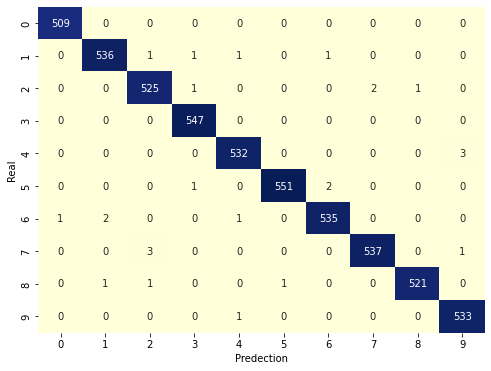

In [82]:
cmat = confusion_matrix(y_test, y_test_predict, labels=label_nums)
plt.figure(figsize=(8,6))
sns.heatmap(cmat, annot = True, cbar = False, cmap='YlGnBu', fmt="d", xticklabels=label_nums, yticklabels=label_nums);

plt.xlabel('Predection')
plt.ylabel('Real')


## ***Test*** Report

In [83]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       509
           1       0.99      0.99      0.99       540
           2       0.99      0.99      0.99       529
           3       0.99      1.00      1.00       547
           4       0.99      0.99      0.99       535
           5       1.00      0.99      1.00       554
           6       0.99      0.99      0.99       539
           7       1.00      0.99      0.99       541
           8       1.00      0.99      1.00       524
           9       0.99      1.00      1.00       534

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352
weighted avg       1.00      1.00      1.00      5352

